In [1]:
import numpy as np
import os
import pandas as pd
mfccs_folder = "D:\Swarming project buzz1\Features Extracted Data\MFCCs_Features"

Noneswarming_train = np.load(os.path.join(mfccs_folder, 'Train', 'Noneswarming_train.npy'))
Swarming_train = np.load(os.path.join(mfccs_folder, 'Train', 'Swarming_train.npy'))

Noneswarming_test = np.load(os.path.join(mfccs_folder, 'Test', 'Noneswarming_test.npy'))
Swarming_test = np.load(os.path.join(mfccs_folder, 'Test', 'Swarming_test.npy'))

Noneswarming_val = np.load(os.path.join(mfccs_folder, 'Val', 'Noneswarming_val.npy'))
Swarming_val = np.load(os.path.join(mfccs_folder, 'Val', 'Swarming_val.npy'))

C:\Users\hoang\AppData\Local\Temp\ipykernel_15580\207520565.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Concatenate the data and create labels
X_train = np.concatenate([Noneswarming_train, Swarming_train], axis=0)
y_train = np.concatenate([np.zeros(Noneswarming_train.shape[0]), np.ones(Swarming_train.shape[0])])

X_test = np.concatenate([Noneswarming_test, Swarming_test], axis=0)
y_test = np.concatenate([np.zeros(Noneswarming_test.shape[0]), np.ones(Swarming_test.shape[0])])

X_val = np.concatenate([Noneswarming_val, Swarming_val], axis=0)
y_val = np.concatenate([np.zeros(Noneswarming_val.shape[0]), np.ones(Swarming_val.shape[0])])

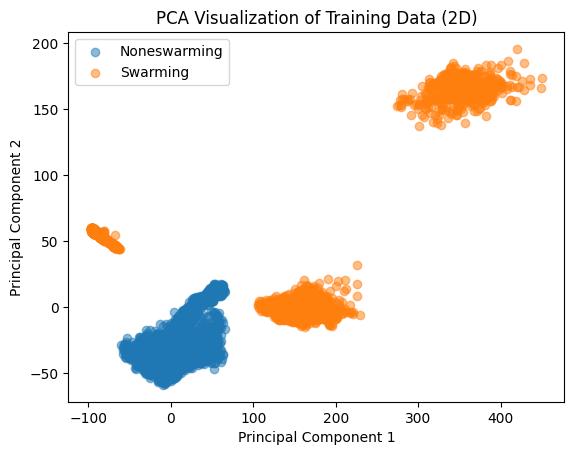

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the dimensionality to 2 components for each set
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

# Create a scatter plot of the first two principal components for training set
plt.scatter(X_train_pca[y_train == 0][:, 0], X_train_pca[y_train == 0][:, 1], label='Noneswarming', alpha=0.5)
plt.scatter(X_train_pca[y_train == 1][:, 0], X_train_pca[y_train == 1][:, 1], label='Swarming', alpha=0.5)

# Add labels and legend for the training set plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Visualization of Training Data (2D)')
plt.show()




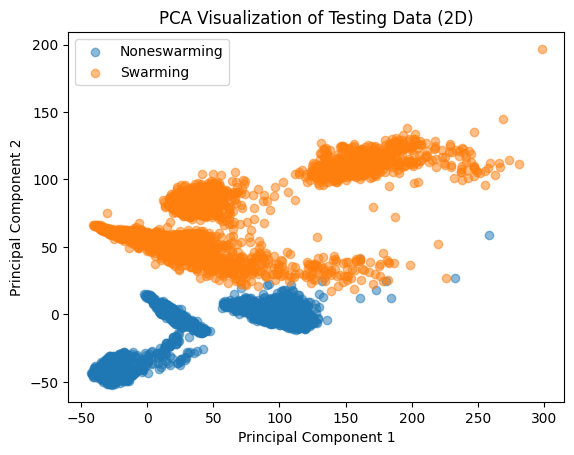

In [4]:
# Create a scatter plot of the first two principal components for testing set
plt.scatter(X_test_pca[y_test == 0][:, 0], X_test_pca[y_test == 0][:, 1], label='Noneswarming', alpha=0.5)
plt.scatter(X_test_pca[y_test == 1][:, 0], X_test_pca[y_test == 1][:, 1], label='Swarming', alpha=0.5)

# Add labels and legend for the testing set plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Visualization of Testing Data (2D)')
plt.show()

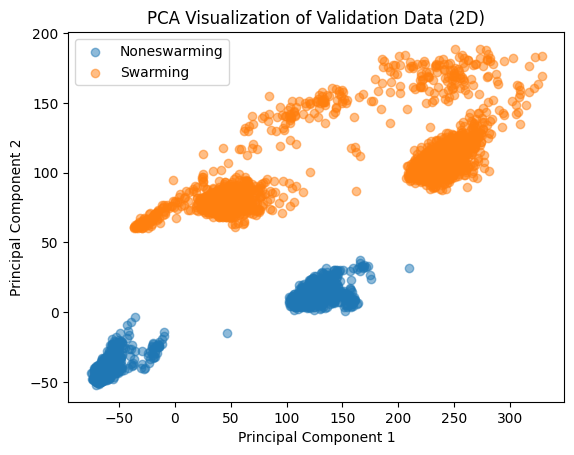

In [5]:
# Create a scatter plot of the first two principal components for validation set
plt.scatter(X_val_pca[y_val == 0][:, 0], X_val_pca[y_val == 0][:, 1], label='Noneswarming', alpha=0.5)
plt.scatter(X_val_pca[y_val == 1][:, 0], X_val_pca[y_val == 1][:, 1], label='Swarming', alpha=0.5)

# Add labels and legend for the validation set plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Visualization of Validation Data (2D)')
plt.show()